# Multiple_Linear_Regression_Toyota_Corolla

# Importing Data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
tc = pd.read_csv('D:\excelR\Multiple_Linear_regression\ToyotaCorolla.csv',encoding="ISO-8859-1")

In [3]:
tc

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [4]:
tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [6]:
tc.isna().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [7]:
tc2=pd.concat([tc.iloc[:,2:4],tc.iloc[:,5:9],tc.iloc[:,12:14],tc.iloc[:,15:18]],axis=1)
tc2

,Price,Age_08_04,Mfg_Year,KM,Fuel_Type,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,2002,46986,Diesel,90,2000,3,5,210,1165
1,13750,23,2002,72937,Diesel,90,2000,3,5,210,1165
2,13950,24,2002,41711,Diesel,90,2000,3,5,210,1165
3,14950,26,2002,48000,Diesel,90,2000,3,5,210,1165
4,13750,30,2002,38500,Diesel,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,1998,20544,Petrol,86,1300,3,5,69,1025
1432,10845,72,1998,19000,Petrol,86,1300,3,5,69,1015
1433,8500,71,1998,17016,Petrol,86,1300,3,5,69,1015
1434,7250,70,1998,16916,Petrol,86,1300,3,5,69,1015


In [8]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder

le = LabelEncoder()

# Encode single column status

tc2.Fuel_Type = le.fit_transform(tc2.Fuel_Type)

# Print df.head for checking the transformation
tc2

,Price,Age_08_04,Mfg_Year,KM,Fuel_Type,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,2002,46986,1,90,2000,3,5,210,1165
1,13750,23,2002,72937,1,90,2000,3,5,210,1165
2,13950,24,2002,41711,1,90,2000,3,5,210,1165
3,14950,26,2002,48000,1,90,2000,3,5,210,1165
4,13750,30,2002,38500,1,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,1998,20544,2,86,1300,3,5,69,1025
1432,10845,72,1998,19000,2,86,1300,3,5,69,1015
1433,8500,71,1998,17016,2,86,1300,3,5,69,1015
1434,7250,70,1998,16916,2,86,1300,3,5,69,1015


In [9]:
tc2.describe()

,Price,Age_08_04,Mfg_Year,KM,Fuel_Type,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,1999.625348,68533.259749,1.868384,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,1.540722,37506.448872,0.371572,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1998.000000,1.000000,0.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,1998.000000,43000.000000,2.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,1999.000000,63389.500000,2.000000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,2001.000000,87020.750000,2.000000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,2004.000000,243000.000000,2.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


<AxesSubplot:>

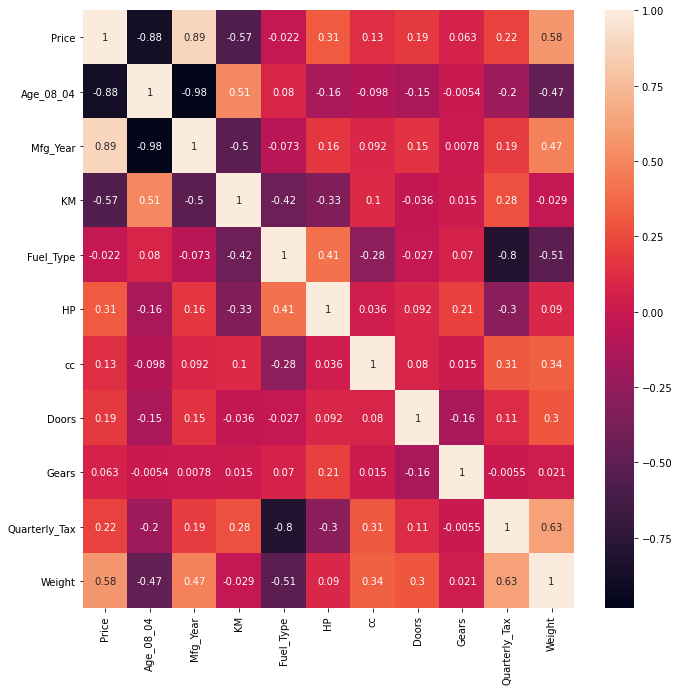

In [10]:
plt.figure(figsize=[11,11])
sns.heatmap(tc2.corr(),annot=True)

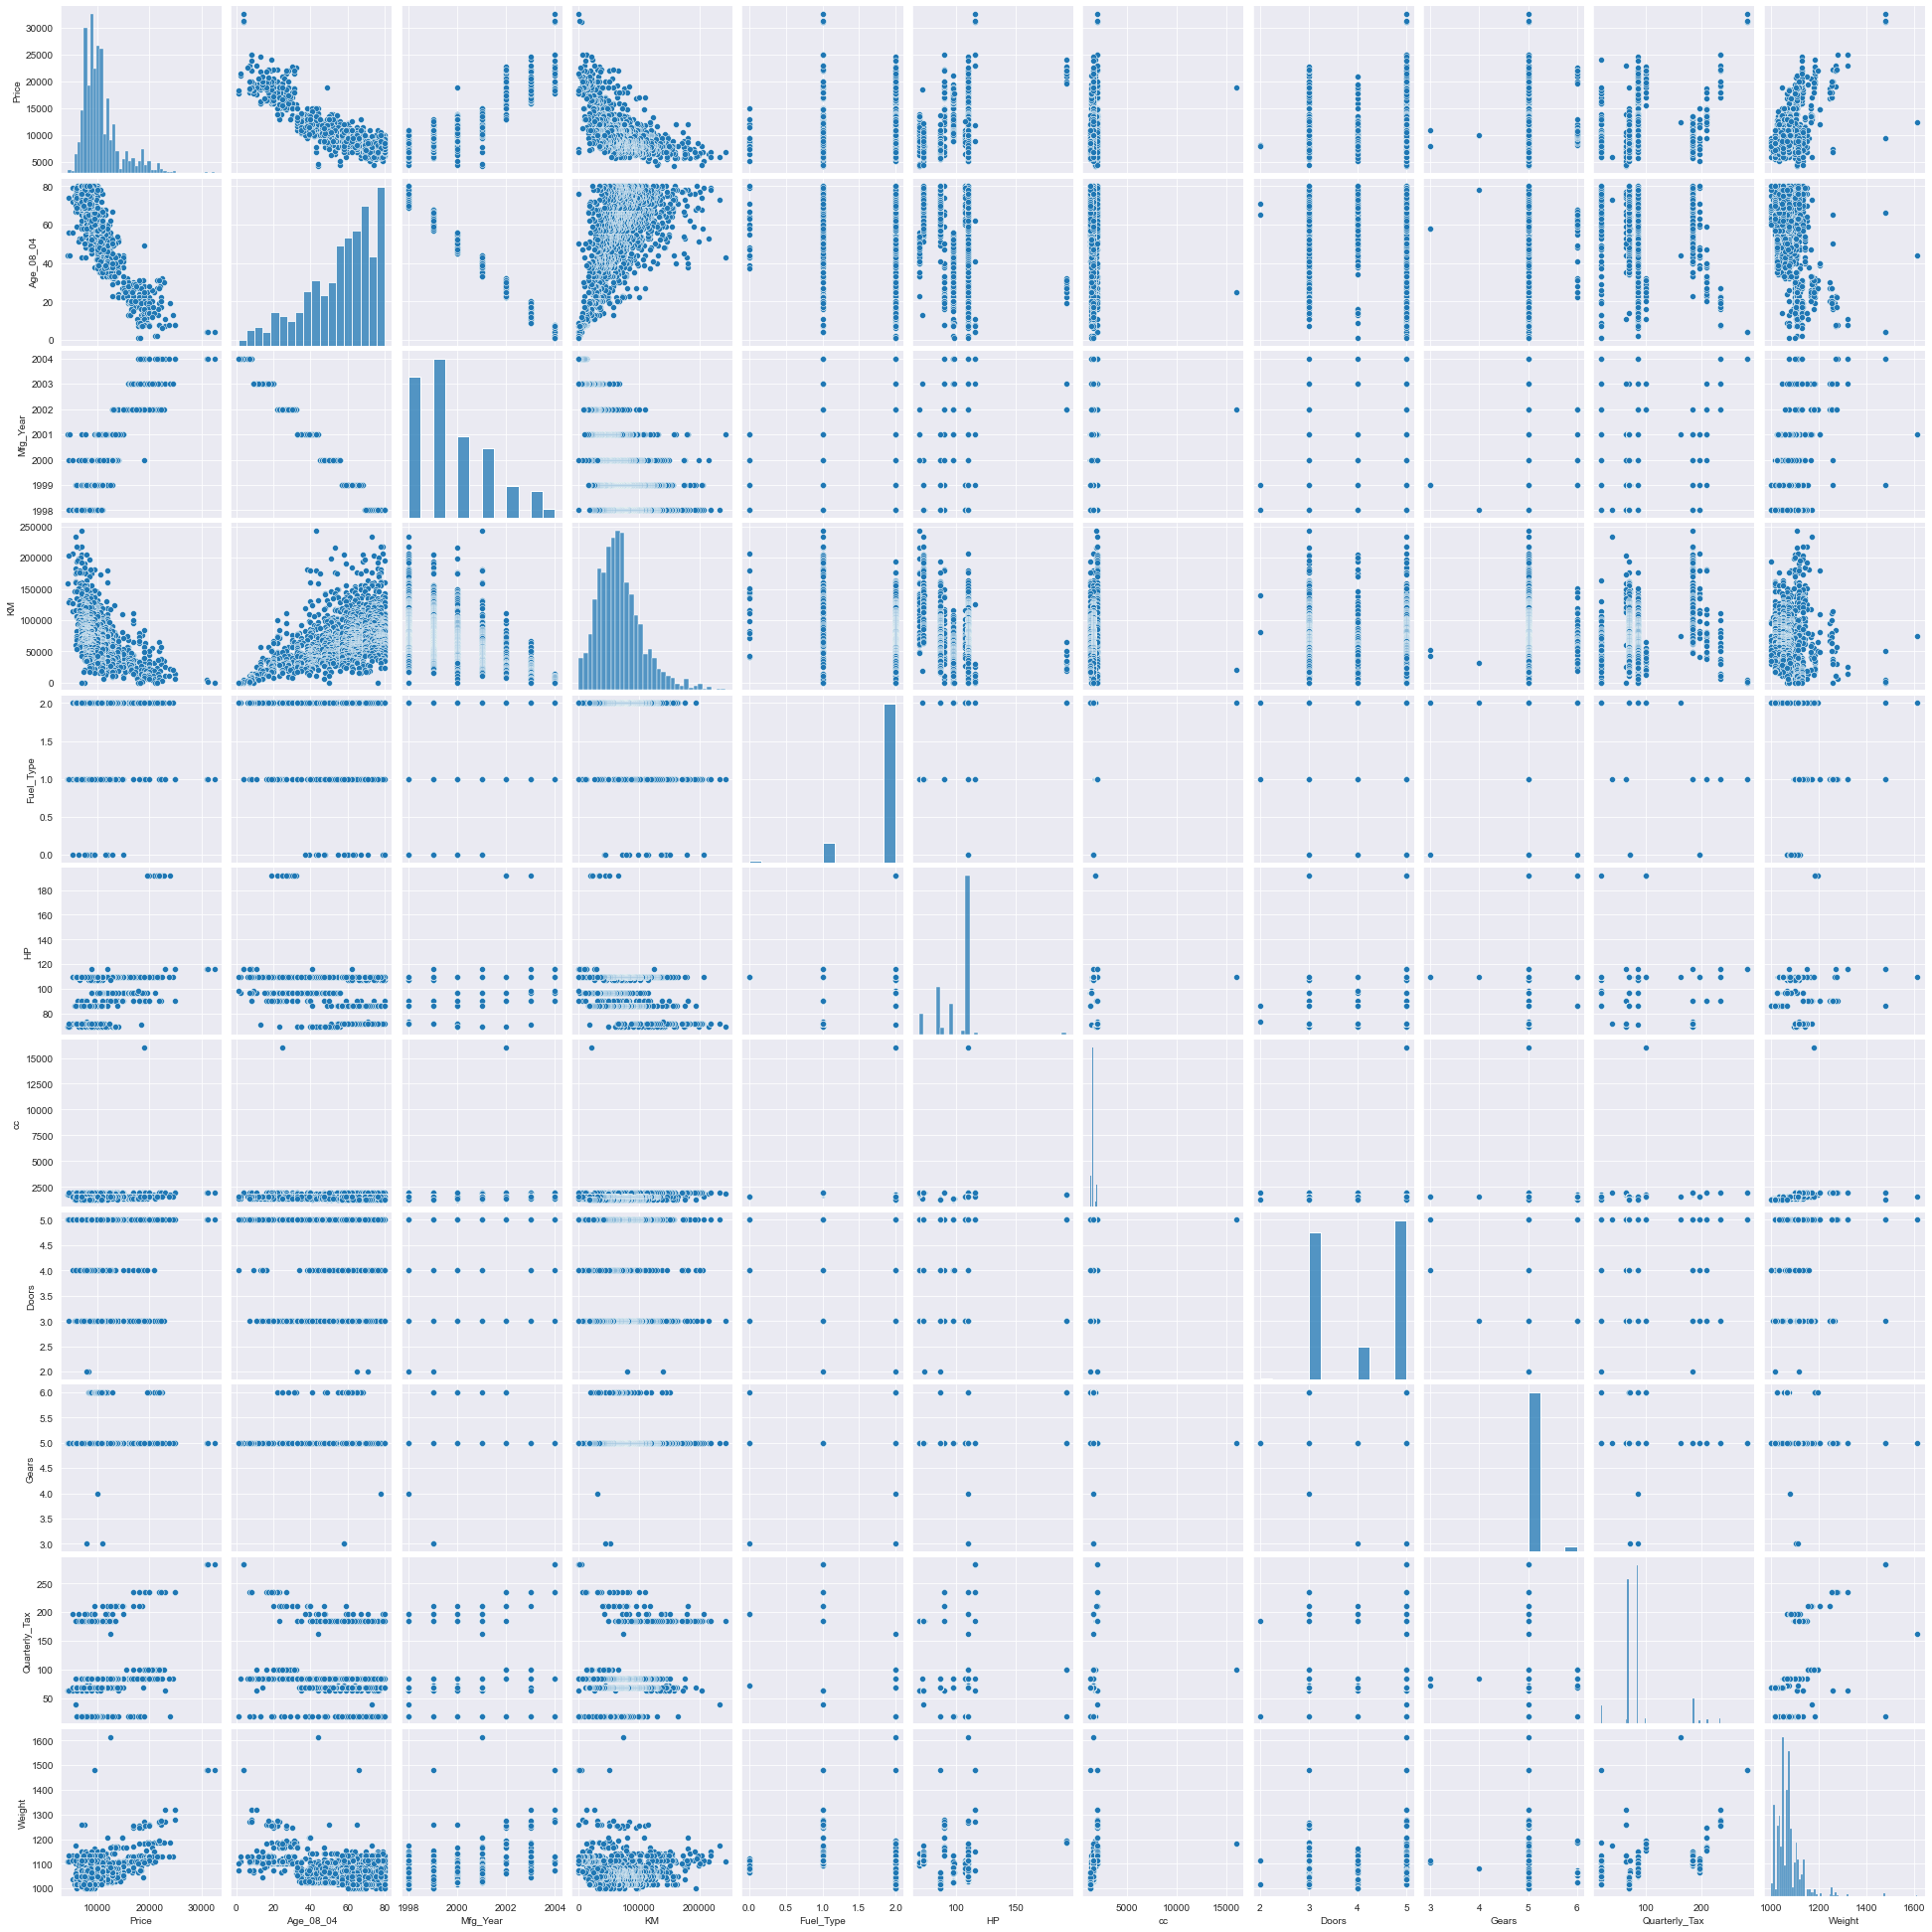

In [11]:
sns.set_style(style='darkgrid')
sns.pairplot(tc2)

In [12]:
tc2[tc2.duplicated()]

,Price,Age_08_04,Mfg_Year,KM,Fuel_Type,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,2004,13253,1,116,2000,5,5,234,1320


In [13]:
tc3=tc2.drop_duplicates().reset_index(drop=True)
tc3

,Price,Age_08_04,Mfg_Year,KM,Fuel_Type,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,2002,46986,1,90,2000,3,5,210,1165
1,13750,23,2002,72937,1,90,2000,3,5,210,1165
2,13950,24,2002,41711,1,90,2000,3,5,210,1165
3,14950,26,2002,48000,1,90,2000,3,5,210,1165
4,13750,30,2002,38500,1,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,1998,20544,2,86,1300,3,5,69,1025
1431,10845,72,1998,19000,2,86,1300,3,5,69,1015
1432,8500,71,1998,17016,2,86,1300,3,5,69,1015
1433,7250,70,1998,16916,2,86,1300,3,5,69,1015


# Model Building

In [45]:
model1=smf.ols('Price~Age_08_04+Mfg_Year+KM+Fuel_Type+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data=tc3).fit()

In [46]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     1009.
Date:                Thu, 27 Jan 2022   Prob (F-statistic):               0.00
Time:                        21:09:24   Log-Likelihood:                -12290.
No. Observations:                1435   AIC:                         2.460e+04
Df Residuals:                    1424   BIC:                         2.466e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.464e+06   2.45e+05    -10.068      0.000   -2.94e+06   -1.98e+06
Age_08_04       -24.3146     10.116     -2.404      0.016     -44.158      -4.471
Mfg_Year       1225.5356    122.172     10.031      0.000     985.879    1465.192
KM               -0.0175      0.001    -14.016      0.000      -0.020      -0.015
Fuel_Type      1251.1953    170.229      7.350      0.000     917.269    1585.122
HP               25.7146      2.765      9.299      0.000      20.290      31.139
cc               -0.0462      0.086     -0.540      0.589      -0.214       0.122
Doors           -41.8243     38.299     -1.092      0.275    -116.954      33.305
Gears           456.4576    187.714      2.432      0.015      88.232     824.683
Quarterly_Tax    10.6598      1.527      6.982      0.000       7.665      13.655
Weight           17.4765      1.037     16.850      0.000      15.442      19.511
==============================================================================
Omnibus:                      207.229   Durbin-Watson:                   1.541
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2286.022
Skew:                          -0.250   Prob(JB):                         0.00
Kurtosis:                       9.163   Cond. No.                     5.69e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.69e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From above summary it is clear that 'cc' (0.589) and 'doors'(0.275) are having pvalues greater than 0.05 indicating that cc and doors are insignificant. Other inputs are significant

# Simple Linear Regression
Since the cc and doors are insignificant we will build individual and combination SLR models of both cc and doors to decide which feature can be dropped

In [16]:
ml_cc = smf.ols('Price~cc',data=tc3).fit()
ml_cc.pvalues                                  # cc is signifcant

Intercept    7.236022e-114
cc            2.292856e-06
dtype: float64

In [17]:
ml_door = smf.ols('Price~Doors',data=tc3).fit()
ml_door.pvalues                                  # doors is signifcant

Intercept    8.976407e-75
Doors        2.404166e-12
dtype: float64

In [18]:
ml_cd = smf.ols('Price~cc+Doors',data=tc3).fit()
ml_cd.pvalues                                  #  both are signifcant

Intercept    1.580945e-35
cc           2.101878e-05
Doors        2.109558e-11
dtype: float64

# Model Deletion Diagnostics

# Finding the influencers/outliers

# 1. Cook's Distance

In [19]:
(d,_)=model1.get_influence().cooks_distance
d

array([0.00538803, 0.0028888 , 0.00400527, ..., 0.00017254, 0.0002123 ,
       0.00803904])

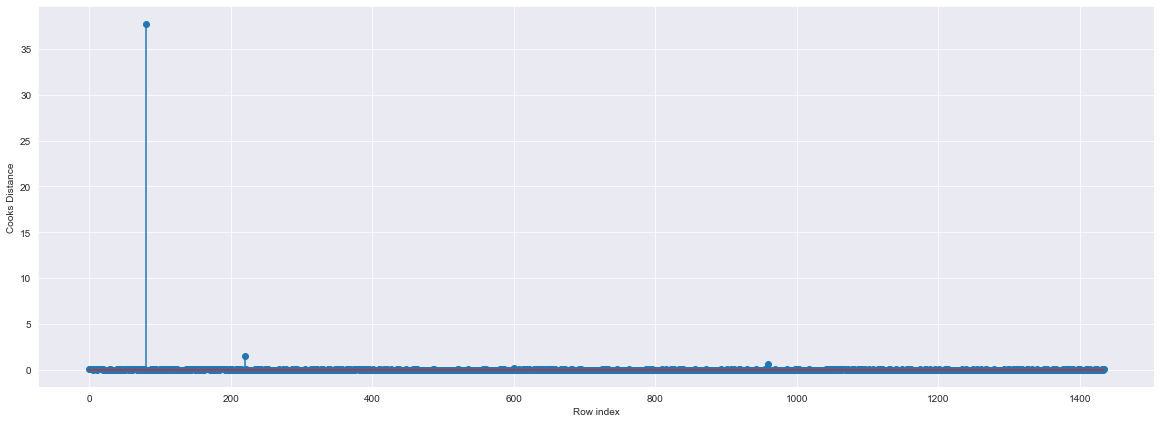

In [20]:
#plotting the influencers
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(tc3)), np.round(d, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [21]:
#index and value of influencer where d is more than .5
(np.argmax(d),np.max(d))

(80, 37.77905665675234)

# 2. High influence point 

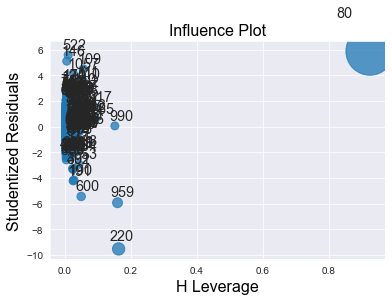

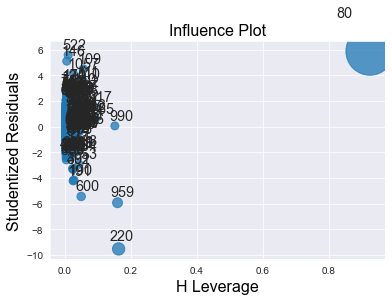

In [22]:
sm.graphics.influence_plot(model1)

In [23]:
tc3[tc3.index.isin([80])]

,Price,Age_08_04,Mfg_Year,KM,Fuel_Type,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,2002,20019,2,110,16000,5,5,100,1180


#  Improving Model 

In [24]:
tc4=tc3.drop(tc3.index[[80]],axis=0).reset_index(drop=True)
tc4

,Price,Age_08_04,Mfg_Year,KM,Fuel_Type,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,2002,46986,1,90,2000,3,5,210,1165
1,13750,23,2002,72937,1,90,2000,3,5,210,1165
2,13950,24,2002,41711,1,90,2000,3,5,210,1165
3,14950,26,2002,48000,1,90,2000,3,5,210,1165
4,13750,30,2002,38500,1,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...,...
1429,7500,69,1998,20544,2,86,1300,3,5,69,1025
1430,10845,72,1998,19000,2,86,1300,3,5,69,1015
1431,8500,71,1998,17016,2,86,1300,3,5,69,1015
1432,7250,70,1998,16916,2,86,1300,3,5,69,1015


In [25]:
model2=model1=smf.ols('Price~Age_08_04+Mfg_Year+KM+Fuel_Type+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data=tc4).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     1032.
Date:                Thu, 27 Jan 2022   Prob (F-statistic):               0.00
Time:                        21:05:25   Log-Likelihood:                -12265.
No. Observations:                1434   AIC:                         2.455e+04
Df Residuals:                    1423   BIC:                         2.461e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.362e+06   2.43e+05     -9.737      0.000   -2.84e+06   -1.89e+06
Age_08_04       -27.3236     10.012     -2.729      0.006     -46.963      -7.685
Mfg_Year       1174.5633    121.068      9.702      0.000     937.073    1412.053
KM               -0.0160      0.001    -12.706      0.000      -0.018      -0.014
Fuel_Type       971.6733    174.843      5.557      0.000     628.695    1314.651
HP               32.4327      2.962     10.948      0.000      26.621      38.244
cc               -1.7867      0.308     -5.804      0.000      -2.391      -1.183
Doors           -51.7322     37.893     -1.365      0.172    -126.065      22.600
Gears           434.2813    185.577      2.340      0.019      70.246     798.316
Quarterly_Tax    12.8739      1.555      8.277      0.000       9.823      15.925
Weight           19.5123      1.082     18.033      0.000      17.390      21.635
==============================================================================
Omnibus:                      281.485   Durbin-Watson:                   1.569
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4501.372
Skew:                          -0.432   Prob(JB):                         0.00
Kurtosis:                      11.637   Cond. No.                     5.71e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.71e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model Validation

# 1. Calculating VIF
Calculating the VIF values to check if there is any dependency amongst the input variables

In [26]:
rsq_age=smf.ols('Age_08_04~Mfg_Year+KM+Fuel_Type+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=tc4).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_Mfgyr=smf.ols('Mfg_Year~Age_08_04+KM+Fuel_Type+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=tc4).fit().rsquared
vif_Mfgyr=1/(1-rsq_Mfgyr)

rsq_KM=smf.ols('KM~Mfg_Year+Age_08_04+Fuel_Type+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=tc4).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Mfg_Year+Age_08_04+Fuel_Type+KM+cc+Doors+Gears+Quarterly_Tax+Weight',data=tc4).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('cc~Mfg_Year+Age_08_04+Fuel_Type+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=tc4).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=smf.ols('Doors~Mfg_Year+Age_08_04+Fuel_Type+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=tc4).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~Mfg_Year+Age_08_04+Fuel_Type+KM+HP+cc+Doors+Quarterly_Tax+Weight',data=tc4).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_QT=smf.ols('Quarterly_Tax~Mfg_Year+Age_08_04+Fuel_Type+KM+HP+cc+Doors+Gears+Weight',data=tc4).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_WT=smf.ols('Weight~Mfg_Year+Age_08_04+Fuel_Type+KM+HP+cc+Doors+Quarterly_Tax+Gears',data=tc4).fit().rsquared
vif_WT=1/(1-rsq_WT)

rsq_ft=smf.ols('Fuel_Type~Weight+Mfg_Year+Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Gears',data=tc4).fit().rsquared
vif_ft=1/(1-rsq_ft)

# Putting the values in Dataframe format
d1={'Variables':['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight','Fuel_Type','Mfg_Year'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_QT,vif_WT,vif_ft,vif_Mfgyr]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,Age_08_04,31.207802
1,KM,2.013451
2,HP,1.782801
3,cc,2.997062
4,Doors,1.178918
5,Gears,1.108672
6,Quarterly_Tax,3.673675
7,Weight,2.885336
8,Fuel_Type,3.808750
9,Mfg_Year,31.291241


It can be seen that two of the VIF values are greater than 10 and that are 'Age_08_04'& 'Mfg_Year'. So this multi collinearity problem can be solved by checking the R2 and AIC values of each model using these features.

# Solving Multi-collinearity problem 

In [27]:
final_ml_V= smf.ols('Price~Age_08_04+KM+Fuel_Type+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data = tc4).fit()
(final_ml_V.rsquared,final_ml_V.aic)

(0.8708484739260756, 24641.34533279902)

In [28]:
final_ml_M= smf.ols('Price~Mfg_Year+KM+Fuel_Type+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data = tc4).fit()
(final_ml_M.rsquared,final_ml_M.aic)

(0.8782270374836898, 24556.9859983608)

##### Comparing above R-Square and AIC values, model 'final_ml_M' has high R- square and low AIC value hence include variable 'Mfg_Year' and drop 'Age_08_04' so that multi collinearity problem would be resolved.

# Residual Analysis

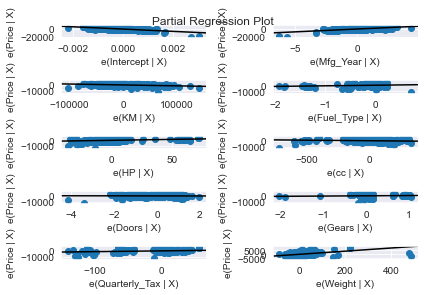

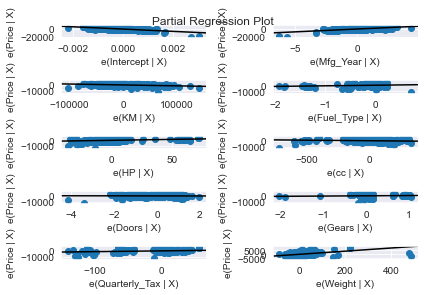

In [29]:
sm.graphics.plot_partregress_grid(final_ml_M)

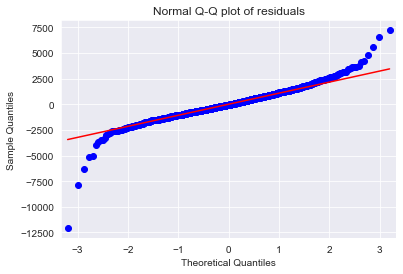

In [30]:
qqplot=sm.qqplot(final_ml_M.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [31]:
list(np.where(final_ml_M.resid>6000))

[array([145, 521], dtype=int64)]

In [32]:
list(np.where(final_ml_M.resid<-6000))

[array([219, 599, 958], dtype=int64)]

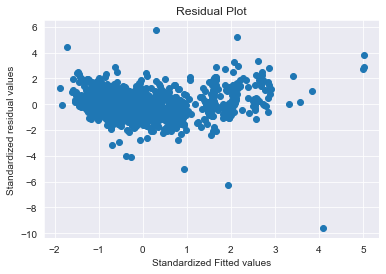

In [33]:
def get_standardized_values(vals) : return (vals-vals.mean())/vals.std() 
plt.scatter(get_standardized_values(final_ml_M.fittedvalues),
            get_standardized_values(final_ml_M.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Final model

In [34]:
model3= smf.ols('Price~Mfg_Year+KM+Fuel_Type+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data = tc4).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     1141.
Date:                Thu, 27 Jan 2022   Prob (F-statistic):               0.00
Time:                        21:05:28   Log-Likelihood:                -12268.
No. Observations:                1434   AIC:                         2.456e+04
Df Residuals:                    1424   BIC:                         2.461e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.004e+06   5.94e+04    -50.603      0.000   -3.12e+06   -2.89e+06
Mfg_Year       1494.8305     29.845     50.087      0.000    1436.286    1553.375
KM               -0.0164      0.001    -13.058      0.000      -0.019      -0.014
Fuel_Type       958.4606    175.171      5.472      0.000     614.839    1302.082
HP               32.1055      2.967     10.822      0.000      26.286      37.925
cc               -1.7370      0.308     -5.639      0.000      -2.341      -1.133
Doors           -51.5517     37.979     -1.357      0.175    -126.052      22.949
Gears           435.1586    185.997      2.340      0.019      70.301     800.016
Quarterly_Tax    12.8541      1.559      8.246      0.000       9.796      15.912
Weight           19.4671      1.084     17.952      0.000      17.340      21.594
==============================================================================
Omnibus:                      287.327   Durbin-Watson:                   1.567
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4676.418
Skew:                          -0.449   Prob(JB):                         0.00
Kurtosis:                      11.801   Cond. No.                     1.39e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
while model3.rsquared < 0.92:
     for d in [np.max(d)>1]:
        model3=smf.ols('Price~Mfg_Year+KM+Fuel_Type+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data = tc4).fit()
        (d,_)=model3.get_influence().cooks_distance
        d
        np.argmax(d) , np.max(d)
        tc4=tc4.drop(tc4.index[[np.argmax(d)]],axis=0).reset_index(drop=True)
        tc4
     else:
        final_model=smf.ols('Price~Mfg_Year+KM+Fuel_Type+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data = tc4).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8878361170741782
Thus model accuracy is improved to 0.8951673143241646
Thus model accuracy is improved to 0.8985755487371954
Thus model accuracy is improved to 0.9003093375398404
Thus model accuracy is improved to 0.9009658533581109
Thus model accuracy is improved to 0.902313904036754
Thus model accuracy is improved to 0.9037931816708251
Thus model accuracy is improved to 0.9049368350988651
Thus model accuracy is improved to 0.9058291915224376
Thus model accuracy is improved to 0.9068015920543303
Thus model accuracy is improved to 0.9085522203048676
Thus model accuracy is improved to 0.9088868613400779
Thus model accuracy is improved to 0.9067365950007549
Thus model accuracy is improved to 0.9063505298441458
Thus model accuracy is improved to 0.9060400187104863
Thus model accuracy is improved to 0.9067395514894984
Thus model accuracy is improved to 0.9062853732685404
Thus model accuracy is improved to 0.9058979960289366
Thus model accuracy is improv

In [36]:
final_model.rsquared, final_model.aic

(0.9204819531957833, 15379.573781758143)

In [37]:
tc4

,Price,Age_08_04,Mfg_Year,KM,Fuel_Type,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,12950,23,2002,71138,1,69,1900,3,5,185,1105
1,16950,29,2002,43905,2,110,1600,3,5,100,1170
2,15950,28,2002,56349,2,110,1600,3,5,85,1120
3,16250,29,2002,25813,2,110,1600,3,5,85,1120
4,15950,25,2002,28450,2,110,1600,3,5,85,1120
...,...,...,...,...,...,...,...,...,...,...,...
969,8950,78,1998,24000,2,86,1300,5,5,85,1065
970,8450,80,1998,23000,2,86,1300,3,5,69,1015
971,7500,69,1998,20544,2,86,1300,3,5,69,1025
972,8500,71,1998,17016,2,86,1300,3,5,69,1015


# Prediction of final model

In [38]:
pred=final_model.predict(tc4)
pred

0      13044.935153
1      17013.305828
2      15493.606619
3      15901.718289
4      15866.474954
           ...     
969     9337.169487
970     8088.809236
971     8461.842625
972     8168.785010
973     8170.121503
Length: 974, dtype: float64

In [39]:
data=[tc4.Price,pred]
data

[0      12950
 1      16950
 2      15950
 3      16250
 4      15950
        ...  
 969     8950
 970     8450
 971     7500
 972     8500
 973     7250
 Name: Price, Length: 974, dtype: int64,
 0      13044.935153
 1      17013.305828
 2      15493.606619
 3      15901.718289
 4      15866.474954
            ...     
 969     9337.169487
 970     8088.809236
 971     8461.842625
 972     8168.785010
 973     8170.121503
 Length: 974, dtype: float64]

<AxesSubplot:>

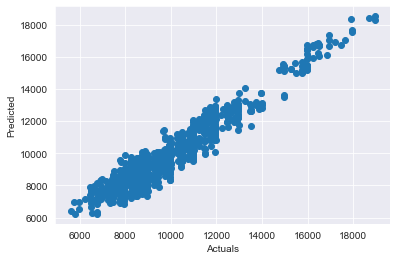

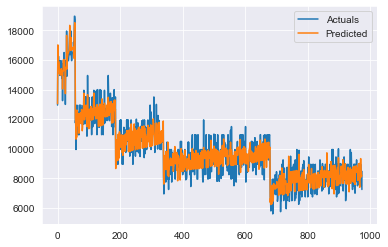

In [49]:
res=res = pd.DataFrame({'Actuals':data[0], 'Predicted':data[1]})
plt.scatter(x=res['Actuals'], y=res['Predicted'])
plt.ylabel('Predicted')
plt.xlabel('Actuals')
res.plot(kind='line')

# Hence the final model predicts data with 92.05% accuracy

In [47]:
d2={'Prep_Models':['Model1','Model2','Final_Model'],'Rsquared':[model1.rsquared, model2.rsquared, final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model1,0.876368
1,Model2,0.878861
2,Final_Model,0.920482


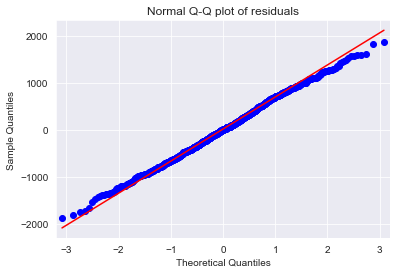

In [50]:
qqplot=sm.qqplot(final_model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

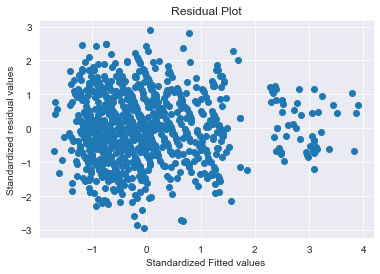

In [51]:
def get_standardized_values(vals) : return (vals-vals.mean())/vals.std() 
plt.scatter(get_standardized_values(final_model.fittedvalues),
            get_standardized_values(final_model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [52]:
finalmodel_testres= res["Actuals"]-res["Predicted"]
finalmodel_testrmse = np.sqrt(np.mean(finalmodel_testres*finalmodel_testres))
finalmodel_testrmse

642.8124074498382